

# Project: Investigate a TMDb Movie  Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from including user rating, revenue, etc. The target is to investigate dataset in movie industry. 

The questions to be answered are:

1. How many movies have been made since 1960?
2. What are the 10 highest-grossing movies in the market?
3. What are the most net profitable and failures movies of all time?
4. What is the number of movies released in each month?
5. What is the total net profit of movies released in each month?
6. Who has directed the most movies? 
7. What are the top casts?
8. What are the top genres?
9. What are the most production companies?
10. Does the budget of the film affect the popularity?
11. Is the revenue associated with a budget?

In [1]:
#import all libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
#load tmdb csv file 
df = pd.read_csv('tmdb-movies.csv')
print(f"The observation in tmdb_movie dataset: {df.shape}")
df.head()

The observation in tmdb_movie dataset: (10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# previous data types and missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#get more information from dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Visualize the data by column to examine the data.

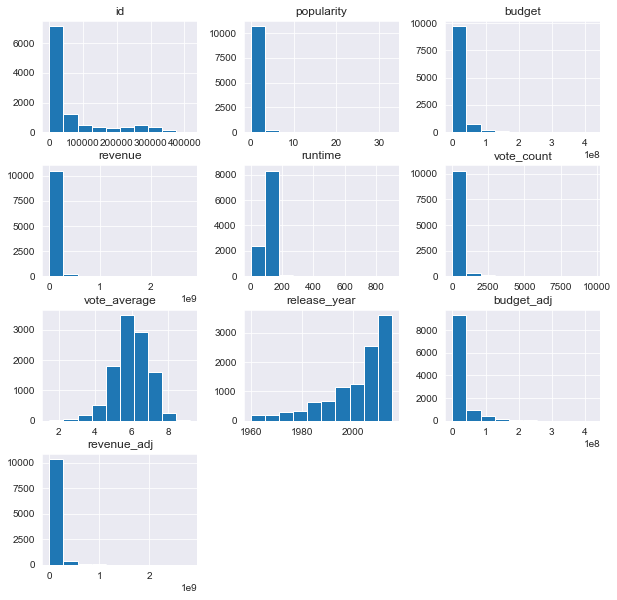

In [5]:
#preview distribution of data from each colomns
df.hist(figsize = (10,10));

In [6]:
# from information above most columns containe 0 value, so check such columns as budget, revenue, popularity, runtime
print(df[df['budget']==0].shape)
print(df[df['revenue']==0].shape)
print(df[df['runtime']==0].shape)
print(df[df['popularity']==0].shape)

(5696, 21)
(6016, 21)
(31, 21)
(0, 21)


Drop the columns that are not useful for this analysis.The columns such as budget, revenue may help to calculate the revenue. 

In [7]:
#Since the columns such as id, tagline, imdb_id, homepage, overview, budget_adj and revenue_adj don't contain usefull information would be better if drop them from dataset  
df.drop(['id','imdb_id','homepage','tagline', 'overview','vote_count','vote_average'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09


In [8]:
# check the null values
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# remove duplicated data
df.drop_duplicates(inplace=True)

In [10]:
#fill th null values with zero
df.fillna(0, inplace=True)

In [11]:
#drop rows with zero value in budget and revenue
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
df['cast'] = df['cast'].replace(0, np.NaN)
df['director'] = df['director'].replace(0, np.NaN)
df['keywords'] = df['keywords'].replace(0, np.NaN)
df['production_companies'] = df['production_companies'].replace(0, np.NaN)
df.dropna(inplace=True)

In [12]:
# check this changes
print(df.isnull().sum())
print(df.duplicated().sum())

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64
0


In [13]:
df.describe()

,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,3677.000000,3.677000e+03,3.677000e+03,3677.000000,3677.000000,3.677000e+03,3.677000e+03
mean,1.226051,3.811465e+07,1.114405e+08,109.561327,2001.091923,4.538793e+07,1.420888e+08
std,1.498897,4.267577e+07,1.793625e+08,19.855075,11.380391,4.519195e+07,2.195158e+08
min,0.010335,1.000000e+00,2.000000e+00,26.000000,1960.000000,9.693980e-01,2.861934e+00
25%,0.481276,1.000000e+07,1.489942e+07,96.000000,1995.000000,1.381637e+07,2.041316e+07
50%,0.830597,2.500000e+07,4.806344e+07,106.000000,2004.000000,3.108049e+07,6.550727e+07
75%,1.411147,5.000000e+07,1.298324e+08,120.000000,2010.000000,6.216097e+07,1.704399e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

###  Q.1 How many movies have been made since 1960

In [14]:
# check what and how many years do we have in columns
years = df['release_year'].unique()
years.sort()
print(years)

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


There are 56 years in this dataset from 1960–2015 

Text(0, 0.5, 'Number of movies produced')

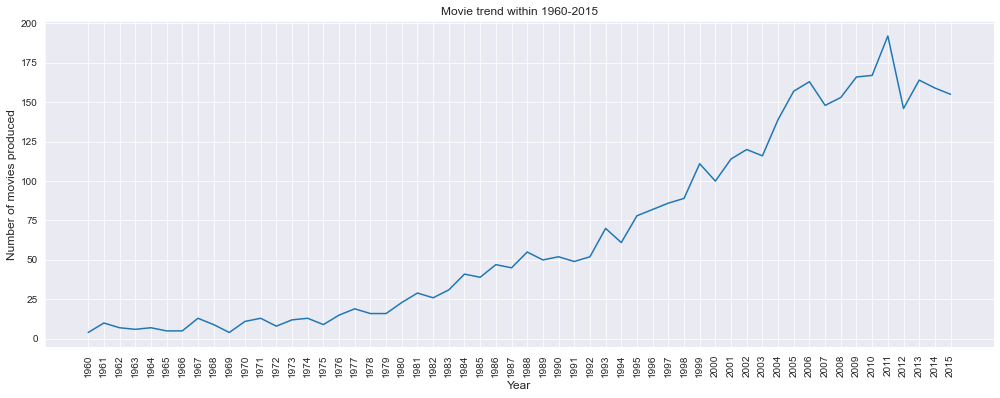

In [15]:
# number of movies have been made each year
plot_movie_year = df['release_year'].value_counts().sort_index();
plt.figure(figsize = (17,6));
plt.plot(plot_movie_year);
plt.title('Movie trend within 1960-2015');
plt.xticks(np.arange(1960,2016,1), rotation = 90);
plt.xlabel('Year', fontsize = 12);
plt.ylabel('Number of movies produced', fontsize = 12)

In [16]:
#Years with max and min moview release
print(f"The highest number of releasing movies was in:{plot_movie_year.idxmax()}")
print(f"The lowest number of releasing movies was in:{plot_movie_year.idxmin()}")

The highest number of releasing movies was in:2011
The lowest number of releasing movies was in:1960


The highest number of releasing movies was in 2011 and the lowest is in 1960. The graph depicts that the releasing movies have increased significantly over years. 

### Q.2 What are the 10 highest-grossing movies in the market?

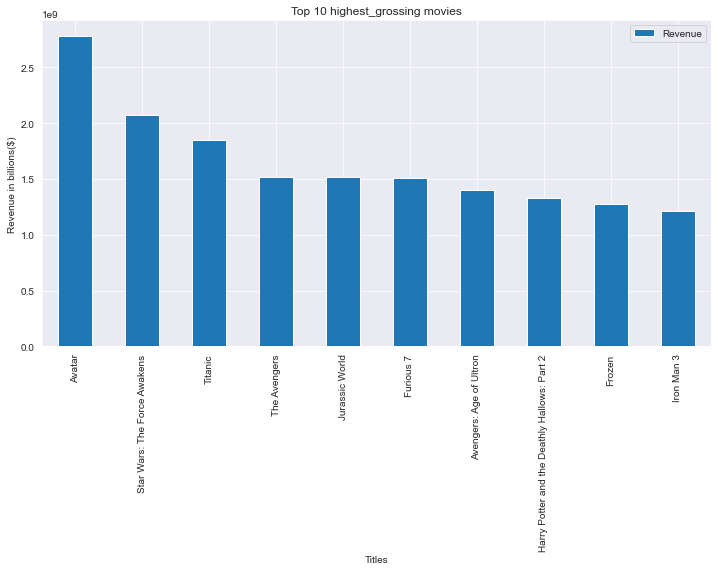

In [17]:
#first sort the raw data by the revenue
top_10_revenue = df['revenue'].sort_values(ascending=False)[:10]
#create title and high gross list which will be used as X, Y values i the bar graph
high_gros = pd.DataFrame()
titles = []
revenues = []
#fill the value from the raw value to the list
for i in top_10_revenue.index:
    titles.append(df.loc[i,'original_title'])
    revenues.append(top_10_revenue.loc[i])
high_gros['Titles']=titles
high_gros['Revenue']=revenues
high_gros.set_index('Titles', inplace=True)
#create a plot
high_gros.plot(kind ='bar', figsize = (12,6))
plt.title('Top 10 highest_grossing movies');
plt.ylabel('Revenue in billions($)');

In [18]:
print(high_gros)

                                                   Revenue
Titles                                                    
Avatar                                        2.781506e+09
Star Wars: The Force Awakens                  2.068178e+09
Titanic                                       1.845034e+09
The Avengers                                  1.519558e+09
Jurassic World                                1.513529e+09
Furious 7                                     1.506249e+09
Avengers: Age of Ultron                       1.405036e+09
Harry Potter and the Deathly Hallows: Part 2  1.327818e+09
Frozen                                        1.274219e+09
Iron Man 3                                    1.215440e+09


The most highest-grossing movie in the market is Avatar.

### Q.3 What are the most net profitable and failures movies of all time?

In [19]:
# create netto gross profit in terms of 2010 dollars, accounting for inflation over time 
df['net_profit_adj'] = df['revenue_adj'] - df['budget_adj']
df.head(5)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,net_profit_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09,1.210949e+09


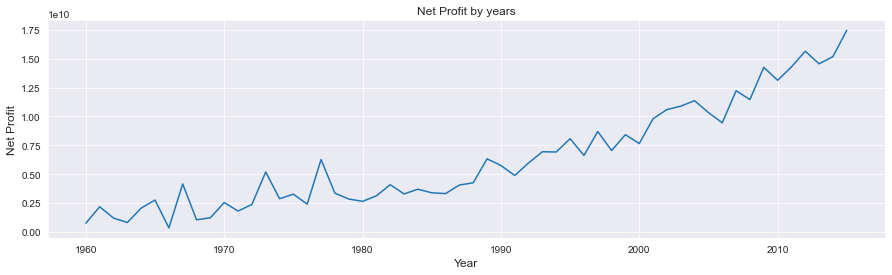

In [20]:
# create a graph with net profit over years 
profits_years = df.groupby('release_year')['net_profit_adj'].sum()
plt.figure(figsize = (15,4));
plt.plot(profits_years);
plt.title('Net Profit by years', fontsize = 12);
plt.xlabel('Year', fontsize = 12);
plt.ylabel('Net Profit', fontsize = 12);

The graph shows above an upward trend in Net Profit 1960-2015 with affect inflation in 2010. 
In 2000 the net profit was nearly 7,5 billion dollars and it has reached up 17,5 billion dollars in 2015. 
The film industry is a profit industry.

In [21]:
#create the condition in order to find out moviews with lowest and higest net profit
movie_np = df['net_profit_adj'].mean()
movie_hnp = df[df['net_profit_adj'] >= movie_np].sort_values(by = 'net_profit_adj', ascending = False)

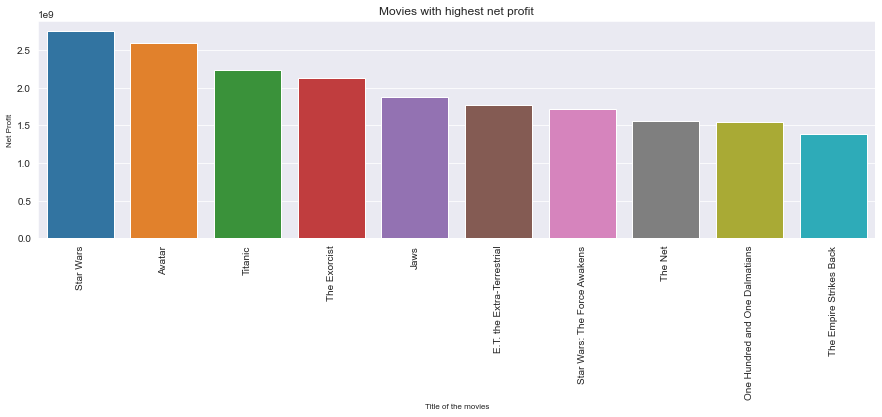

In [22]:
# create a bar chart 
plt.figure(figsize = (15,4));
sns.barplot(x = movie_hnp['original_title'][0:10],
            y = movie_hnp['net_profit_adj'][0:10]);
plt.title('Movies with highest net profit', fontsize = 12); 
plt.xticks(rotation = 90);
plt.xlabel('Title of the movies', fontsize = 8);
plt.ylabel('Net Profit', fontsize = 8);

In [23]:
# create a table for movies with the highest net profit 
movie_hnp.loc[:,['original_title', 'release_year']][0:10]

,original_title,release_year
1329,Star Wars,1977
1386,Avatar,2009
5231,Titanic,1997
10594,The Exorcist,1973
9806,Jaws,1975
8889,E.T. the Extra-Terrestrial,1982
3,Star Wars: The Force Awakens,2015
8094,The Net,1995
10110,One Hundred and One Dalmatians,1961
7309,The Empire Strikes Back,1980


In [24]:
movie_lnp = df.sort_values(by = 'net_profit_adj')

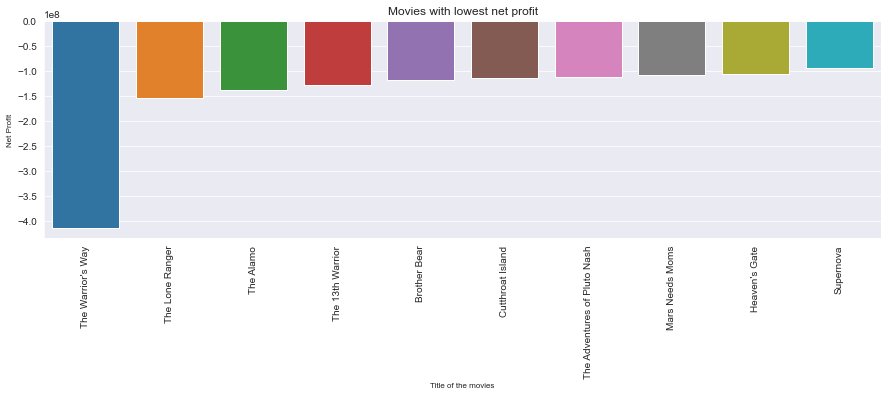

In [25]:
plt.figure(figsize = (15,4));
sns.barplot(x = movie_lnp['original_title'].head(10),
            y = movie_lnp['net_profit_adj'].head(10));
plt.title('Movies with lowest net profit', fontsize = 12); 
plt.xticks(rotation = 90);
plt.xlabel('Title of the movies', fontsize = 8);
plt.ylabel('Net Profit', fontsize = 8);

In [26]:
movie_lnp.loc[:,['original_title', 'release_year']][0:10]

,original_title,release_year
2244,The Warrior's Way,2010
5508,The Lone Ranger,2013
7031,The Alamo,2004
2435,The 13th Warrior,1999
4970,Brother Bear,2003
8102,Cutthroat Island,1995
4078,The Adventures of Pluto Nash,2002
3484,Mars Needs Moms,2011
7332,Heaven's Gate,1980
8765,Supernova,2000


Movies with highest net profit is Star Wars in 1977. The Warrior's Way was the worst made movie of 2010 that has proven to be a failure.

### Q.4  What is the number of movies released in each month?

In [27]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = df['release_date'].dt.strftime("%B")
df['release_month'].head(5)

0        June
1         May
2       March
3    December
4       April
Name: release_month, dtype: object

Text(0, 0.5, 'Monthly Total Profit')

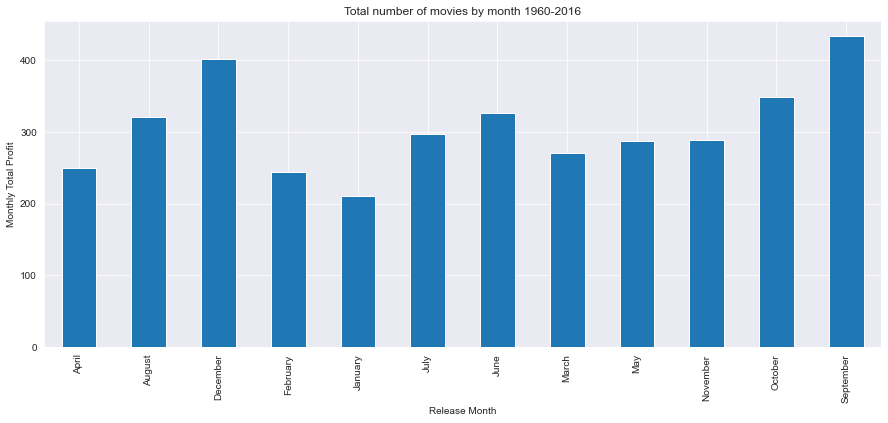

In [28]:
plt.figure(figsize=(15,6))
count_month = df.groupby('release_month')['net_profit_adj'].count()
count_month.plot.bar()
plt.title("Total number of movies by month 1960-2016", fontsize = 12)
plt.xlabel('Release Month', fontsize = 10)
plt.ylabel('Monthly Total Profit', fontsize = 10)

The biggest number of releasing movies are in December, October and September.

### Q.5  What is the total net profit of movies released in each month?

Text(0, 0.5, 'Monthly Total Profit')

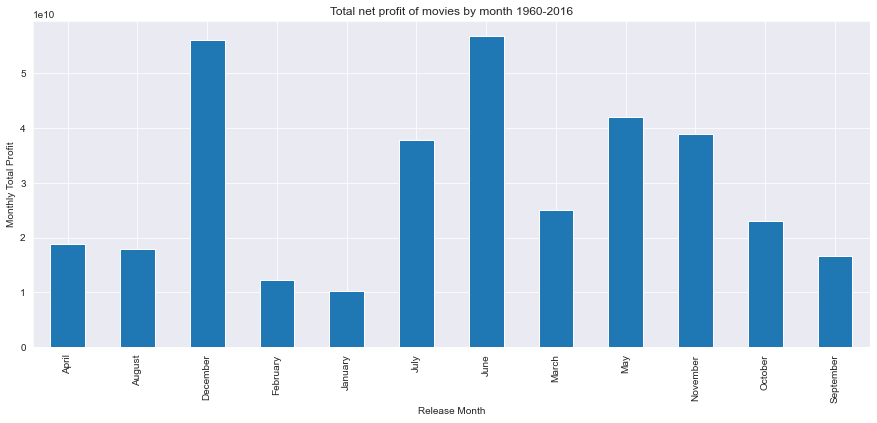

In [29]:
plt.figure(figsize=(15,6))
count_month = df.groupby('release_month')['net_profit_adj'].sum()
count_month.plot.bar()
plt.title("Total net profit of movies by month 1960-2016", fontsize = 12)
plt.xlabel('Release Month', fontsize = 10)
plt.ylabel('Monthly Total Profit', fontsize = 10)

The bas chart depicts that monts as December and June are the most net profitable month to release movies

### Q.6 Who has directed the most movies? 

In [30]:
# display some columns what might be needed for further investigation
df.loc[:,['original_title', 'cast', 'director', 'genres', 'production_companies']].head()

,original_title,cast,director,genres,production_companies
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...


As we can see cast, director, genres, production_companies are separated by '|' character. 
First we need to define a function to separate cast, director, genres, production_companies then calculate the number of movies in each columns.

In [31]:
# create the function 1 and create a new value 
def extract_data(column_name):
    col = ['cast','director', 'genres', 'production_companies']

    for col_name in col:
        df[col_name] = df[col_name].astype(str)
        
# create a value and safe concatenate rows to make the result more meaningful.From the column entered, separated the by "|" character.    
    all_data = df[column_name].str.cat(sep = '|')
    all_data = pd.Series(all_data.split('|'))
    count = all_data.value_counts(ascending = False)
    
    count = pd.DataFrame(data=count).head(10)
    return count

In [32]:
# create the function 2 for barplot for further invesgation, add a few more new values. 
def drawChart(x_val, y_val, bar_title, bar_xlab, bar_ylab):
    plt.figure(figsize = (14,4));
    sns.barplot(x = x_val, y = y_val);
    plt.title(bar_title, fontsize = 16);
    plt.xlabel(bar_xlab, fontsize = 10);
    plt.ylabel(bar_ylab, fontsize = 10);
    plt.xticks(rotation = 90);

Now we can visualize the result to make conclusion.

In [33]:
# use the function 1 for directors
top_director = extract_data('director')
top_director

,0
Steven Spielberg,28
Clint Eastwood,23
Ridley Scott,21
Steven Soderbergh,17
Tim Burton,17
Martin Scorsese,17
Woody Allen,17
Robert Rodriguez,16
Renny Harlin,15
Oliver Stone,15


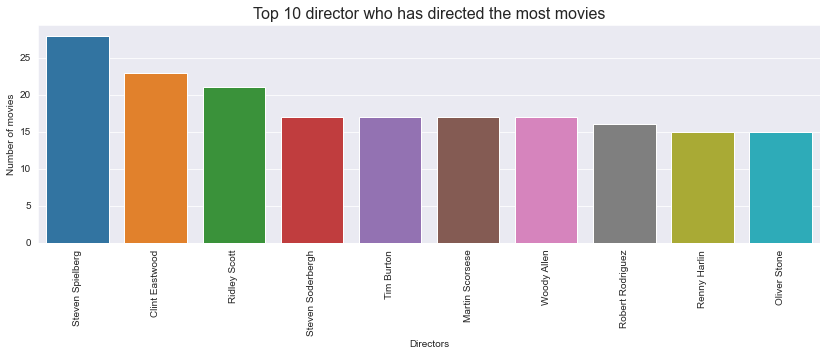

In [34]:
# use the function 2 for director, barplot
drawChart(top_director.index, top_director.values.flatten(), 'Top 10 director who has directed the most movies', 'Directors','Number of movies')

 The top director is Steven Spielberg

### Q.7 What are the top casts?

In [35]:
# use the function 1 for cast
top_cast = extract_data('cast')
top_cast

,0
Robert De Niro,50
Bruce Willis,46
Samuel L. Jackson,43
Nicolas Cage,42
Johnny Depp,35
Tom Hanks,34
Brad Pitt,34
Matt Damon,34
Morgan Freeman,34
Tom Cruise,33


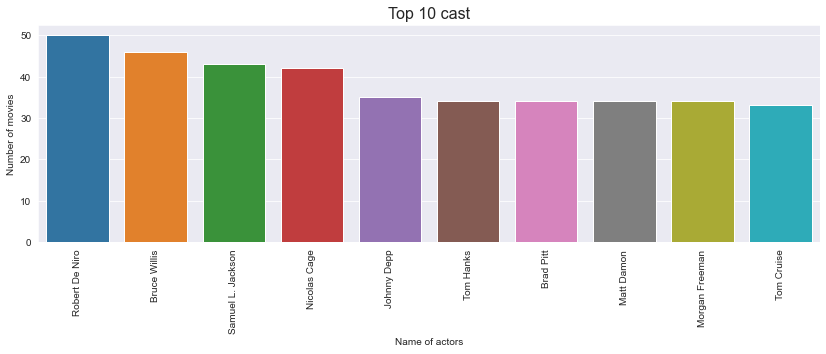

In [36]:
# # use the function 2 for cast, barplot
drawChart(top_cast.index, top_cast.values.flatten(), 'Top 10 cast', 'Name of actors','Number of movies')

The top cast is Robert De Niro

### Q.8 What are the top genres?

In [37]:
# # use the function 1 for genres
top_genres = extract_data('genres')
top_genres

,0
Drama,1666
Comedy,1280
Thriller,1159
Action,1043
Adventure,725
Romance,628
Crime,628
Science Fiction,510
Horror,445
Family,403


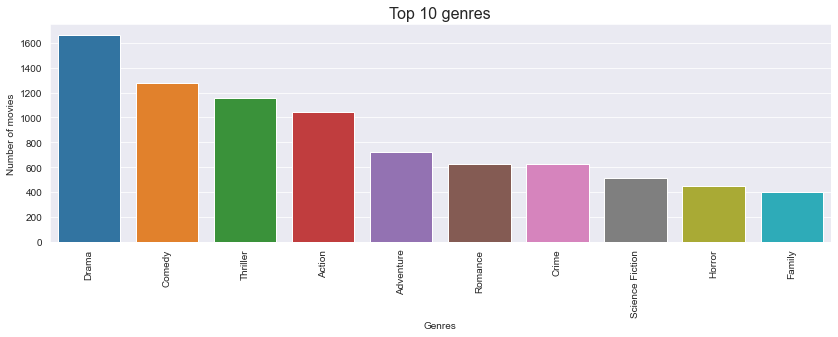

In [38]:
# use the function 2 for genres, barplot
drawChart(top_genres.index, top_genres.values.flatten(), 'Top 10 genres', 'Genres','Number of movies')

The genre which has the highest number of movies is Drama

### Q.9 What are the most production companies?

In [39]:
# use the function 1 for production_companies
top_production_companies = extract_data('production_companies')
top_production_companies

,0
Universal Pictures,322
Warner Bros.,318
Paramount Pictures,266
Twentieth Century Fox Film Corporation,196
Columbia Pictures,177
New Line Cinema,146
Walt Disney Pictures,114
Touchstone Pictures,112
Metro-Goldwyn-Mayer (MGM),108
Columbia Pictures Corporation,100


The table proves the fact that the most production company is Universal Pictures. 

### Q.10 Does the budget of the film affect the popularity?

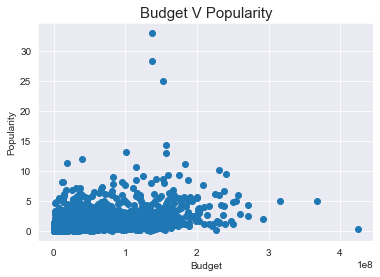

In [40]:
# Plot scatter plot for two columns
plt.title('Budget V Popularity', fontsize = 15)
plt.xlabel('Budget', fontsize = 10)
plt.ylabel('Popularity', fontsize = 10)
plt.scatter(df['budget_adj'], df['popularity'])

From this scatter plot we can see a positive correlation. 

### Q.11 Is the revenue associated with a budget?

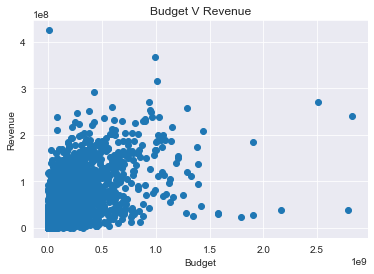

In [41]:
# Plot scatter plot for two columns
plt.title('Budget V Revenue', fontsize = 12)
plt.xlabel('Budget', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)
plt.scatter(df['revenue_adj'], df['budget_adj'])

There are two variables are substantially positively associated with each other. It means that the higher budget has a slight correlation with the higher revenue.

# Conclusions

This report has analyzed The Movie Database (TMDb). During my investigation have been removed around 2000 rows with Null values, duplicates, and 0 values in order to provide more accurate results. I took a decision to create a new column with the name net_profit_adj with an inflation effect, since we have to take into consideration an inflation effect for net profit. 
There has been made line plot, bar chart, tables and scatter plot to answer questions. 

In conclusion, the number of movies has been increased significantly over years. The film industry is a profitable industry over time even with an inflation effect. The most frequent genre is Drama. The most production company is Universal Pictures. Despite the fact that the biggest number of releasing movies are in December, October, and September the most net profitable month to release movies are December and June. 

#### Limitation:  
This analysis can be limited because of missing values and existing duplicates in cells. Since the most important columns such as revenue and budget contained a lot of 0 rows I had to drop a lot of them. Lack of some values in the dataset led to cut by a few thousand rows and affected the overall analysis.
#### Sources: 
Pandas documents, 
Kaggle guide,
github project

